# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [333]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Imported all packages successfully")

Imported all packages successfully


### Understanding the structure of the data

In [338]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [350]:
# Using shape method to check for rows and columns 
total_rows, total_columns = df.shape

print("Total Rows:", total_rows)
print("Total Columns:", total_columns)

Total Rows: 1898
Total Columns: 9


In [351]:
# Using Describe method to get all stats 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


Observation - Had to convert rating into different data type for calculations 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [352]:
# Using dtypes as well info method to describe data types
print("Data types of each column:")
data_types = df.dtypes
print(data_types)
df.info()

Data types of each column:
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [353]:
# Checking for null values isna method 
print("Missing values: ")
df.isna().sum()

Missing values: 


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [354]:
# Leveraging built in functions to check min, mean and max 
min_order_time=df['food_preparation_time'].min()
max_order_time=df['food_preparation_time'].max()
mean_order_time=df['food_preparation_time'].mean()

print("minimum order time:", min_order_time)
print("maximum order time:", max_order_time)
print("average order time:", round(mean_order_time,2))

minimum order time: 20
maximum order time: 35
average order time: 27.37


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [355]:
no_ratings=(df['rating'] == 'Not given').sum()
print("Total Orders without ratings:", no_ratings)

Total Orders without ratings: 736


#### Observations:

Around 38% of orders are not rated 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

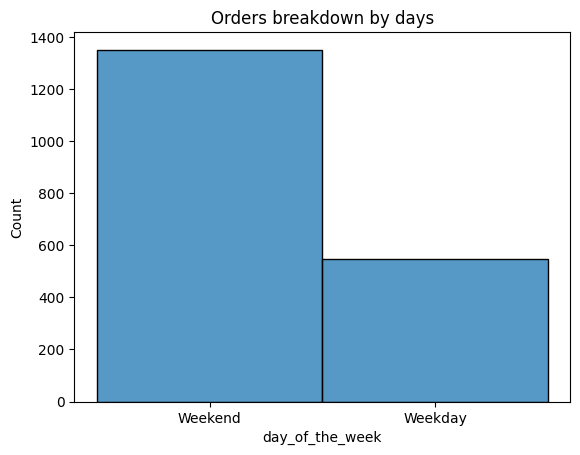

In [347]:
# Trying to visualizes orders when compared to weekday vs weekend 
plt.title('Orders breakdown by days')
sns.histplot(data=df, x='day_of_the_week')
plt.show()

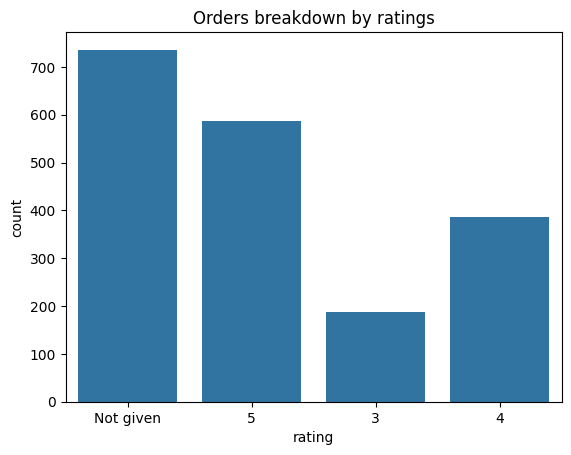

In [357]:
plt.title('Orders breakdown by ratings')
sns.countplot(data=df, x='rating')
plt.show()

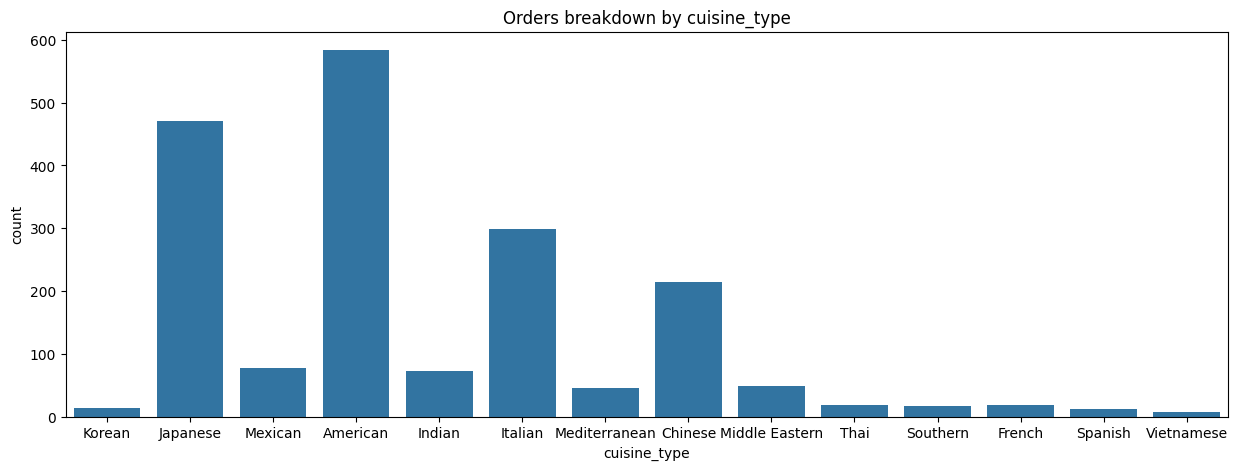

In [358]:
plt.figure(figsize=(15,5))
plt.title('Orders breakdown by cuisine_type')
sns.countplot(data=df, x='cuisine_type')
plt.show()

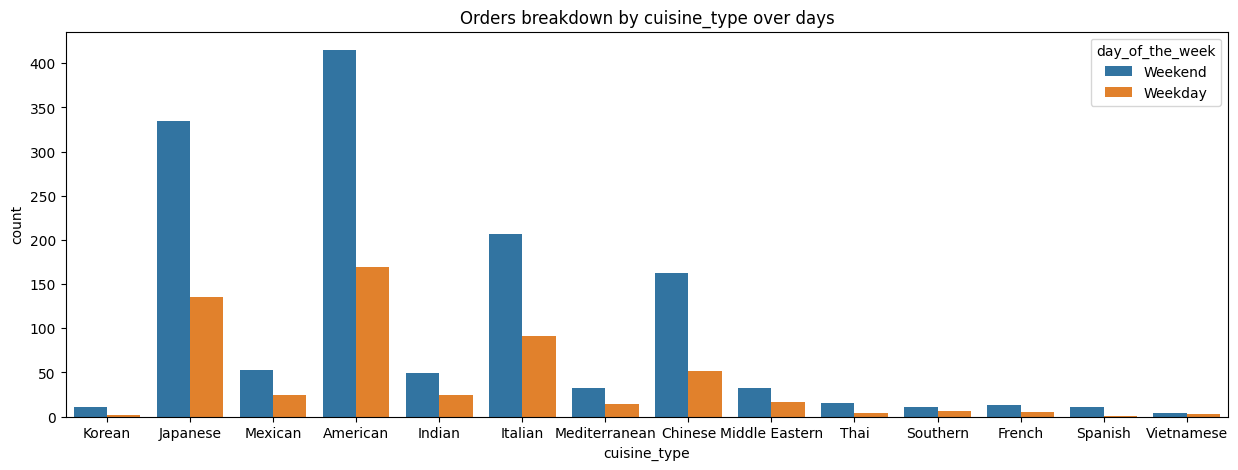

In [359]:
plt.figure(figsize=(15,5))
plt.title('Orders breakdown by cuisine_type over days')
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.show()

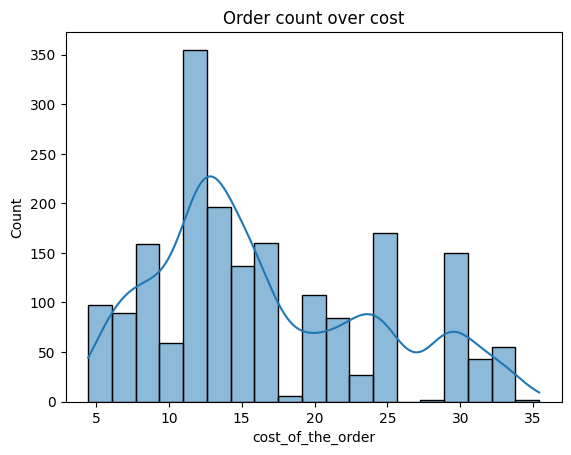

In [360]:
# Graph for cost of the order 
plt.title('Order count over cost')
sns.histplot(data=df, x='cost_of_the_order',kde=True)
plt.show()

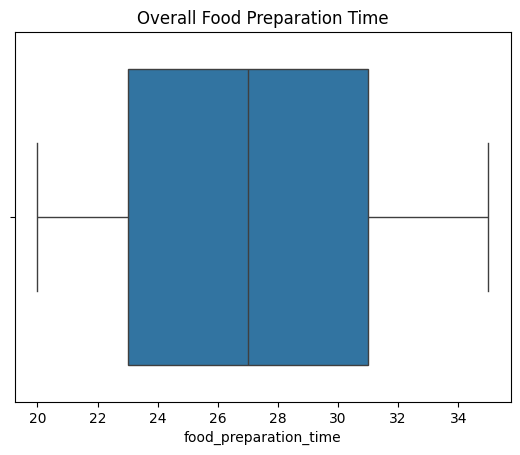

In [361]:
plt.title("Overall Food Preparation Time")
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

<Axes: title={'center': 'Overall Delivery Time'}, xlabel='delivery_time'>

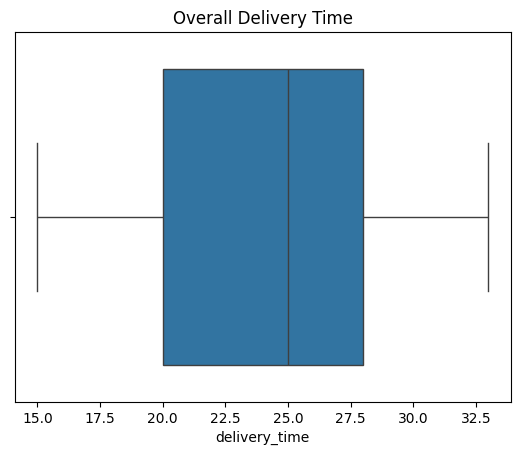

In [362]:
plt.title("Overall Delivery Time")
sns.boxplot(data=df, x='delivery_time')

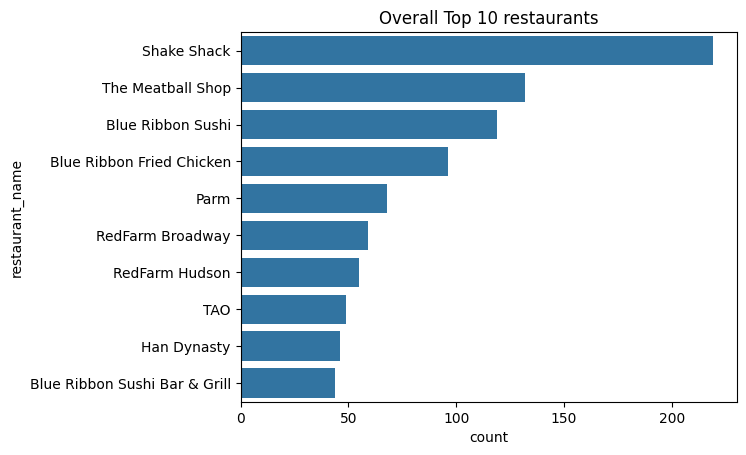

In [236]:
plt.title('Overall Top 10 restaurants')
top_restaurants = df['restaurant_name'].value_counts().nlargest(10).index
filtered_df = df[df['restaurant_name'].isin(top_restaurants)]
sns.countplot(data=filtered_df, y='restaurant_name', order=filtered_df['restaurant_name'].value_counts().index)
plt.show()

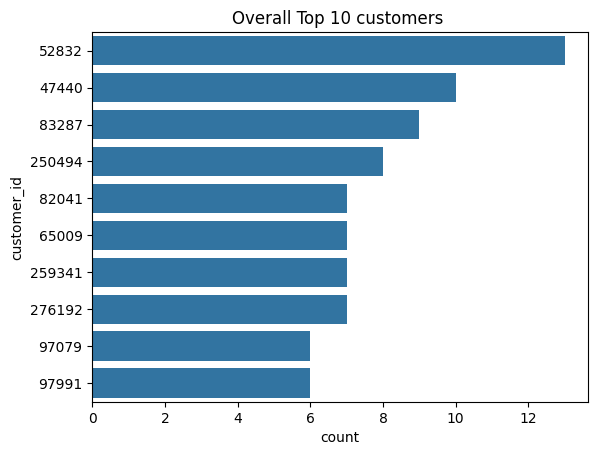

In [363]:
plt.title('Overall Top 10 customers ')
top_restaurants = df['customer_id'].value_counts().nlargest(10).index
filtered_df = df[df['customer_id'].isin(top_restaurants)]
sns.countplot(data=filtered_df, y='customer_id', order=filtered_df['customer_id'].value_counts().index)
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [364]:
print("===== Top 5 restaurants ====")
top_restaurants= df['restaurant_name'].value_counts().head(5)
print(top_restaurants)

===== Top 5 restaurants ====
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [365]:
weekend_data=df[df['day_of_the_week'] == 'Weekend']
popular_cuisine=weekend_data['cuisine_type'].value_counts().head(1)
print("Most Popular Cuisine on Weekends:",popular_cuisine)

Most Popular Cuisine on Weekends: cuisine_type
American    415
Name: count, dtype: int64


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [366]:
orders_20_higher=df['cost_of_the_order']>20
percentage = (orders_20_higher.sum() / len(df)) * 100
print("Orders Percentage which cost more than 20 Dollars:",round(percentage,2))

Orders Percentage which cost more than 20 Dollars: 29.24


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [367]:
mean_order_dt=round(df['delivery_time'].mean(),2)
print("Mean Order delivery time : ",mean_order_dt)

Mean Order delivery time :  24.16


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [368]:
print(" ====== Top 3 customers with count =======")
df['customer_id'].value_counts().head(3)

 ====== Top 3 customers with count =======


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


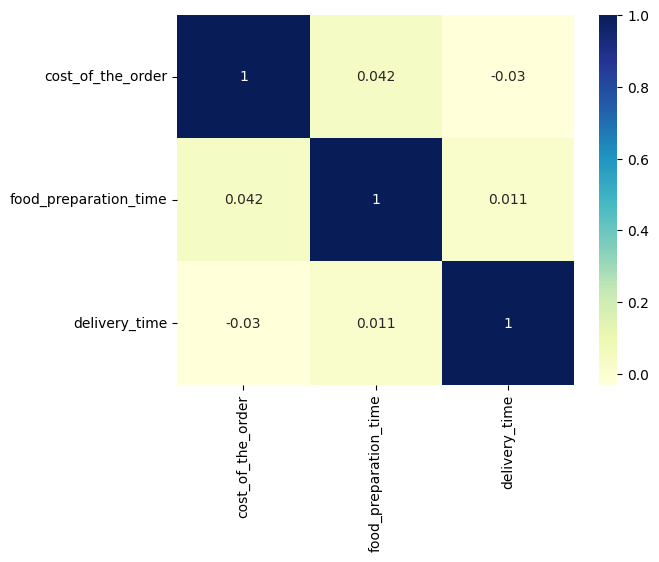

In [372]:
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, cmap='YlGnBu');

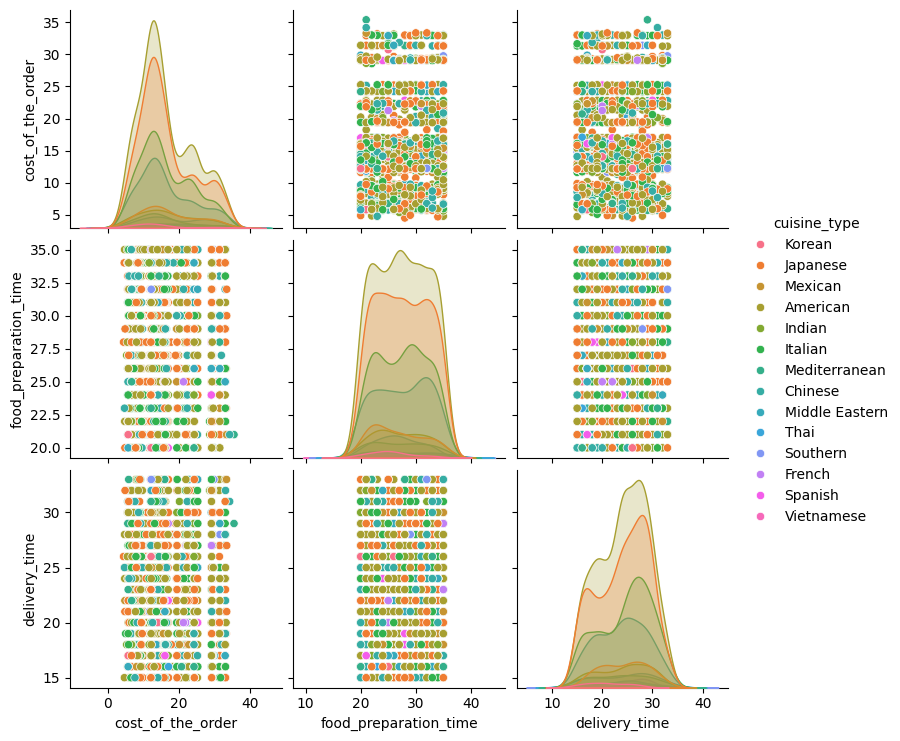

In [373]:
sns.pairplot(data=df, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], hue='cuisine_type');



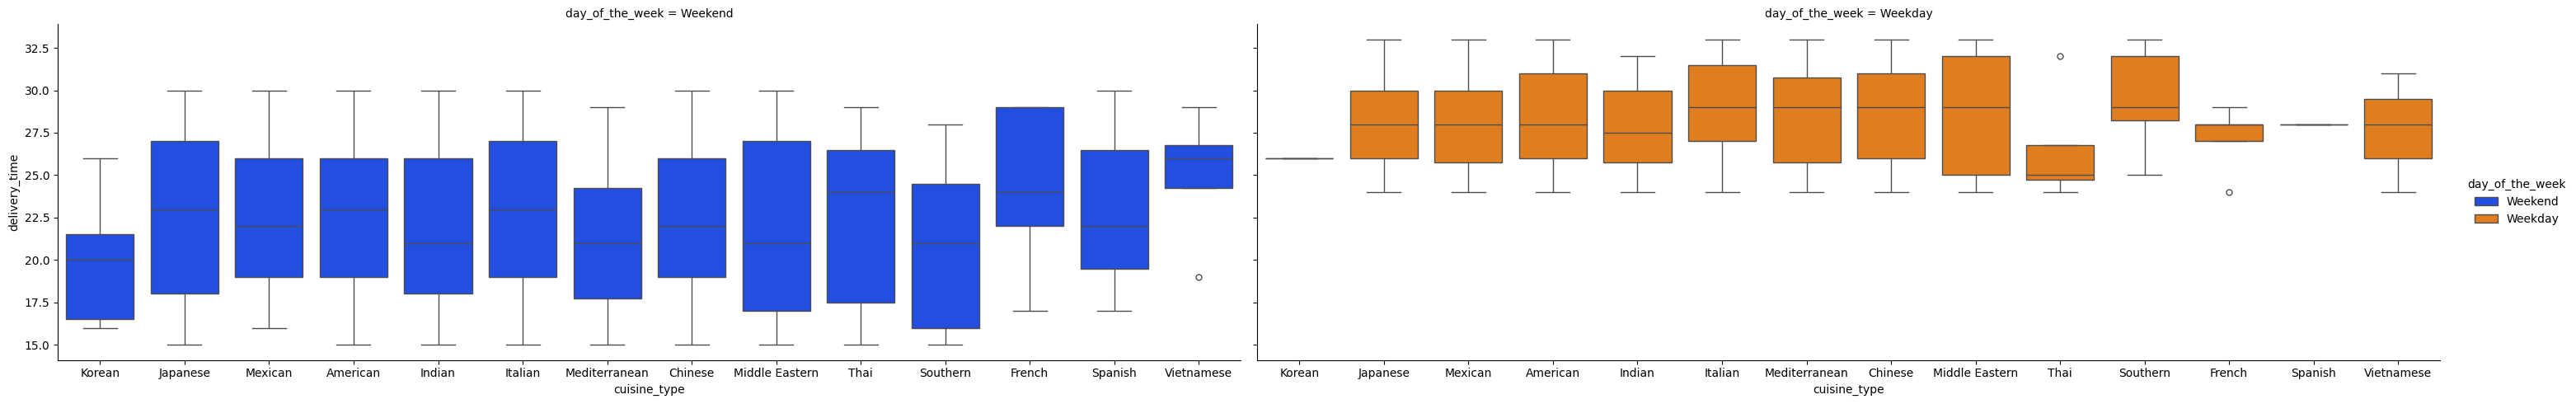

In [309]:
sns.catplot(data=df, x="cuisine_type", y="delivery_time", hue="day_of_the_week", col="day_of_the_week", kind='box', palette='bright',height=5, aspect=3);

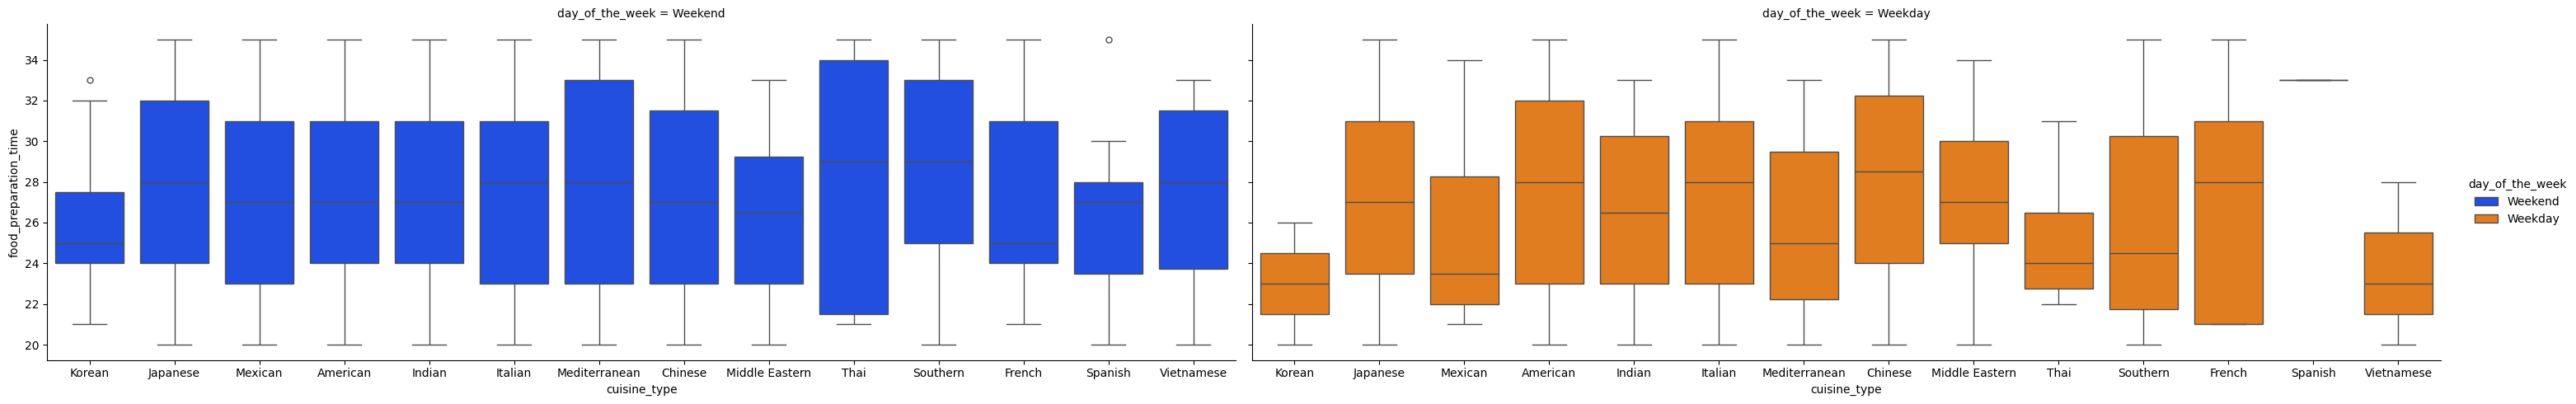

In [308]:
sns.catplot(data=df, x="cuisine_type", y="food_preparation_time", hue="day_of_the_week", col="day_of_the_week", kind='box', palette='bright',height=5, aspect=3);

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [375]:
# Copying dataframe, removing rows without rating, converting the rating column to float type and leveraging aggregate function. In the end filtering the data to get eligible restaurants 
res_data = df.copy(deep=True)
res_data = res_data[res_data['rating'] != 'Not given']
res_data['rating_float']=pd.to_numeric(res_data['rating'])
res_agg_data = res_data.groupby('restaurant_name').agg({
    'rating_float': ['mean', 'count']
})
res_agg_data.columns = ['average_rating', 'rating_count']
eligible_res = res_agg_data[(res_agg_data['rating_count'] > 50) & (res_agg_data['average_rating'] > 4)]
print("Restaurants fulfilling the criteria: ",eligible_res)



Restaurants fulfilling the criteria:                             average_rating  rating_count
restaurant_name                                        
Blue Ribbon Fried Chicken        4.328125            64
Blue Ribbon Sushi                4.219178            73
Shake Shack                      4.278195           133
The Meatball Shop                4.511905            84


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [376]:
# call a function to calculate charges and sum of the column to generate the net revenue 
def charges(i):
  if i > 20:
    return i*0.25 
  elif i > 5 and i < 20: 
    return i*0.15
  else:
    return i==0
df['charges'] = df['cost_of_the_order'].apply(charges)
total_revenue= df['charges'].sum()
print("Total Revenue Generated by Company : ",round(total_revenue,2))

Total Revenue Generated by Company :  6166.3


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [276]:
df['total_time'] = df['food_preparation_time'] + df ['delivery_time']
order_60_dt= df['total_time'] > 60 
percentage = (order_60_dt.sum() / len(df)) * 100
print("Percentage of orders taking more than 60 mins: ",round(percentage,2))

Percentage of orders taking more than 60 mins:  10.54


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [377]:
weekend_data=df[df['day_of_the_week'] == 'Weekend']
weekend_delivery_time= weekend_data['delivery_time'].mean()
print("Mean Delivery time during weekend :", round(weekend_delivery_time,2))
weekday_data=df[df['day_of_the_week'] == 'Weekday']
weekday_delivery_time= weekday_data['delivery_time'].mean()
print("Mean Delivery time during weekday: ",round(weekday_delivery_time,2))

print("Mean delivery time vary between weekday vs weekend : ", round(weekday_delivery_time - weekend_delivery_time,2))



Mean Delivery time during weekend : 22.47
Mean Delivery time during weekday:  28.34
Mean delivery time vary between weekday vs weekend :  5.87


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* Shake Shack is the top restaurant, and American cusinie is the most popular 
* Weekends are the busiest days, with orders almost doubled 
* Mean food preparation time is 27.37
* Mean delivery time is 24.16 
* Mean Delivery time over the weekend is faster when compared to weekdays 
* Mean cost of order is 16.49 

### Recommendations:

* Since American cuisine is the most ordered over weekends, allocating more drivers to these restaurants can improve delivery time and improve ratings
* 38% of orders don't have any ratings. To encourage more feedback and get more accurate data, consider providing incentives or discounts to consumers for providing feedback, such as a percentage off their next order or a free item with their next purchase.  
* In general, a higher number of orders are placed during the weekend, so doubling the delivery drivers for weekends can improve the overall customer experience regarding deliveries. 


---